In [1]:
from logging import warning
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

##Read The Dataset

In [2]:
df=pd.read_csv('/content/collegePlace.xls')
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


#Data Preparation
##1)Handling Missing Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [4]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

##2)Handling Outliers

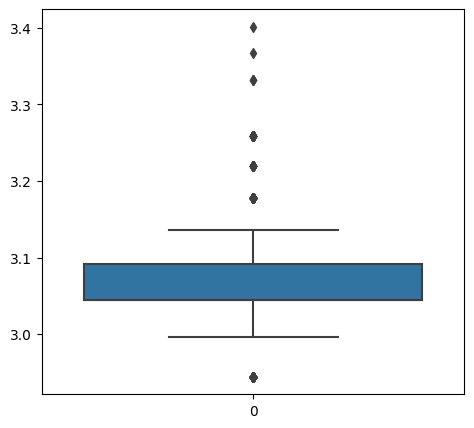

In [5]:
def transformation(feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.boxplot(feature)
transformation(np.log(df['Age']))


##3)Handling Categorical Values

In [6]:
df=df.replace(['Male'],[0])
df=df.replace(['Female'],[1])
df=df.replace(['Civil','Computer Science','Electrical','Electronics And Communication','Information Technology','Mechanical'],[0,1,2,3,4,5])

In [7]:
df=df.drop(['Hostel'],axis=1)
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,3,1,8,1,1
1,21,1,1,0,7,1,1
2,22,1,4,1,6,0,1
3,21,0,4,0,8,1,1
4,22,0,5,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,4,0,7,0,0
2962,23,0,5,1,7,0,0
2963,22,0,4,1,7,0,0
2964,22,0,1,1,7,0,0


In [8]:
print(df['Age'].value_counts(),'\n---------\n',
df['Stream'].value_counts(),'\n-------------\n',
df['Internships'].value_counts(),'\n--------\n',
df['CGPA'].value_counts(),'\n----------\n',
df['HistoryOfBacklogs'].value_counts(),'\n----------\n',
df['PlacedOrNot'].value_counts())

21    1084
22     941
20     375
23     195
19     156
24     131
26      50
25      29
28       3
30       1
29       1
Name: Age, dtype: int64 
---------
 1    776
4    691
3    424
5    424
2    334
0    317
Name: Stream, dtype: int64 
-------------
 0    1331
1    1234
2     350
3      51
Name: Internships, dtype: int64 
--------
 7    956
8    915
6    834
9    165
5     96
Name: CGPA, dtype: int64 
----------
 0    2396
1     570
Name: HistoryOfBacklogs, dtype: int64 
----------
 1    1639
0    1327
Name: PlacedOrNot, dtype: int64


#Visual Analysis
##1)Univariate Analysis

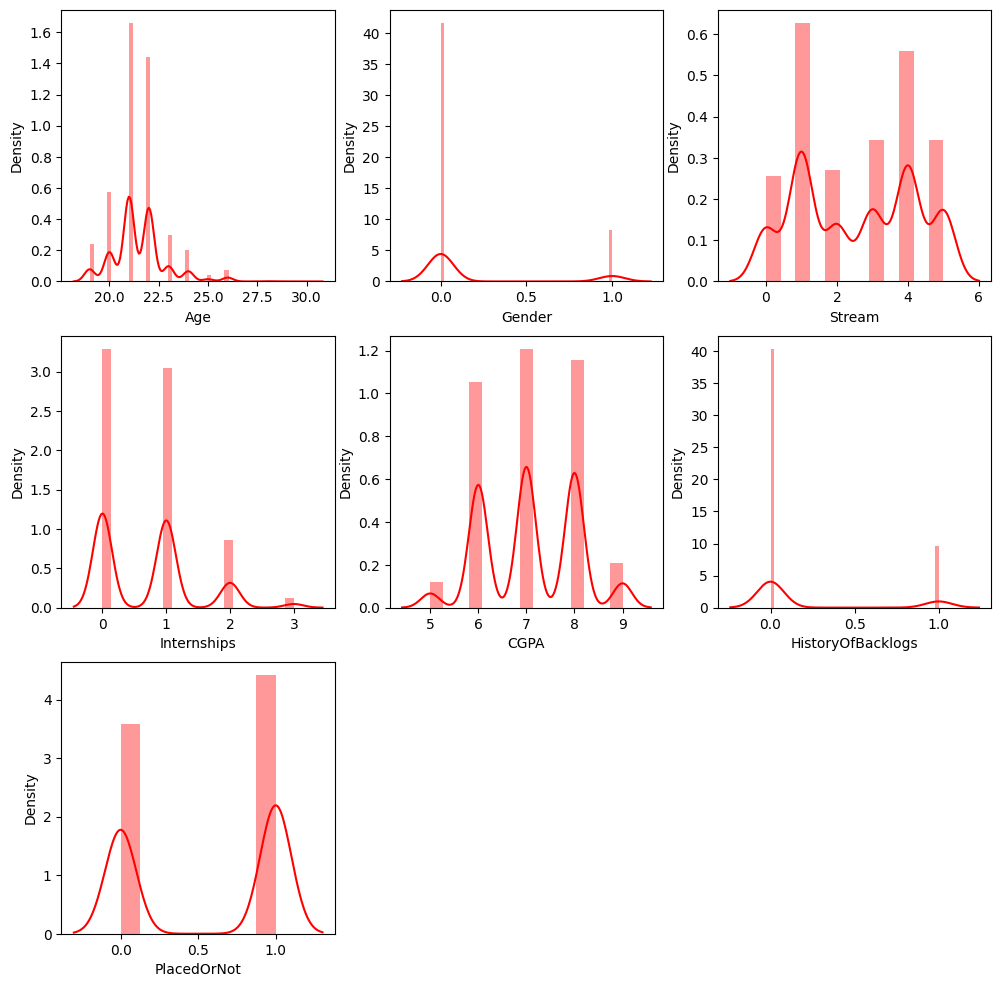

In [9]:
plt.figure(figsize=(12,12))
for i,j in enumerate(df):
   plt.subplot(3,3,i+1)
   sns.distplot(df[j],color='r')

##2)Bivariate Analysis

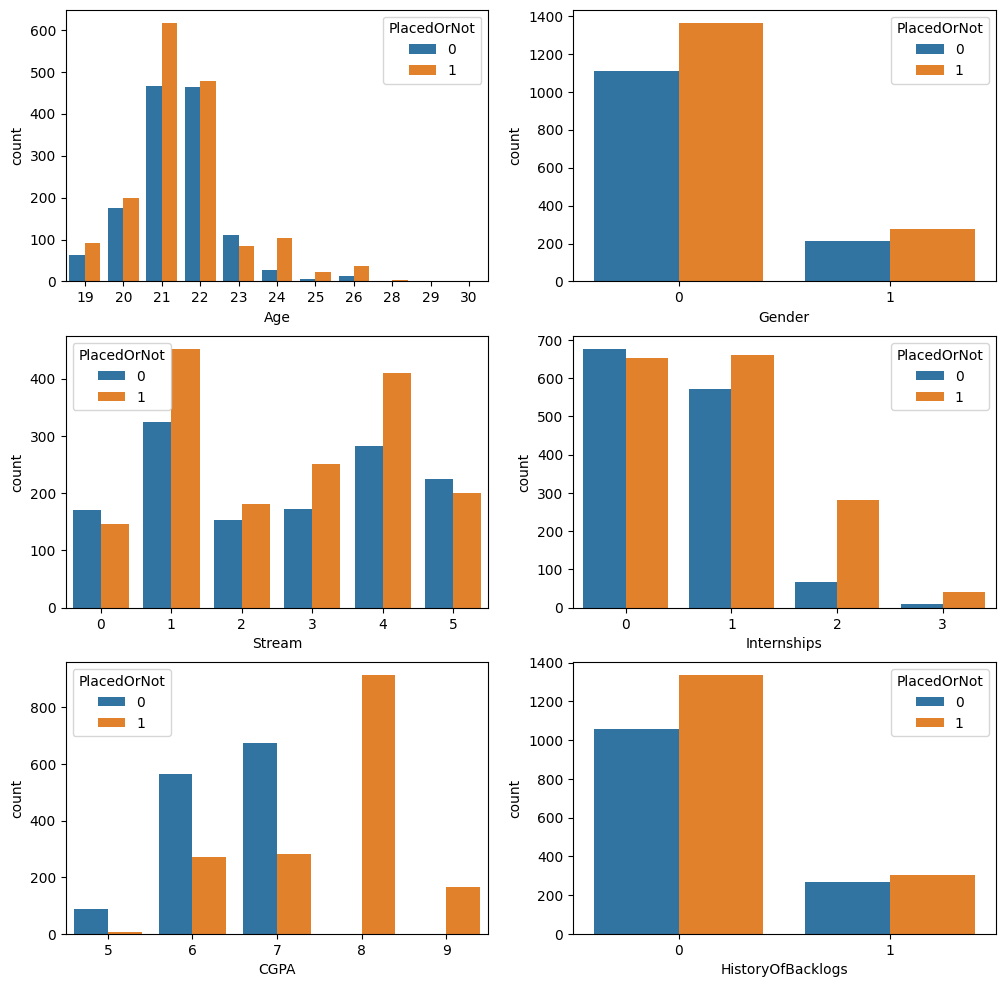

In [10]:
da=df.drop(['PlacedOrNot'],axis=1)
plt.figure(figsize=(12,12))
for i,j in enumerate(da):
   plt.subplot(3,2,i+1)
   sns.countplot(x=df[j],hue='PlacedOrNot',data=df)

##3)Multivariate Analysis

<Axes: xlabel='PlacedOrNot', ylabel='CGPA'>

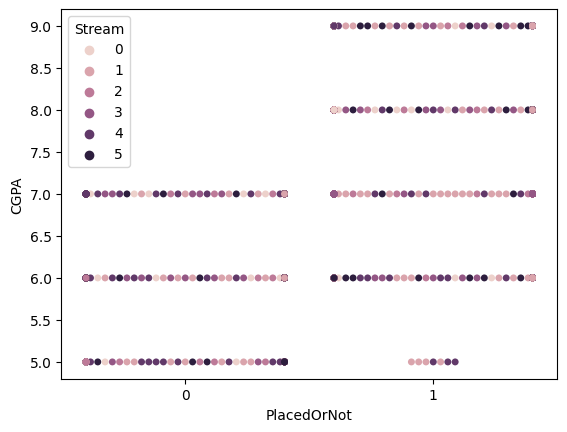

In [11]:
sns.swarmplot(x=df['PlacedOrNot'],y=df['CGPA'],hue=df['Stream'])

##Scaling The Data

In [12]:
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,3,1,8,1,1
1,21,1,1,0,7,1,1
2,22,1,4,1,6,0,1
3,21,0,4,0,8,1,1
4,22,0,5,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,4,0,7,0,0
2962,23,0,5,1,7,0,0
2963,22,0,4,1,7,0,0
2964,22,0,1,1,7,0,0


In [13]:
cname=df.columns[:-1]
sc=StandardScaler()
df[cname]=sc.fit_transform(df[cname])
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,0.388131,-0.445403,0.264655,0.400445,0.957191,2.050246,1
1,-0.366752,2.245158,-0.944846,-0.950773,-0.076310,2.050246,1
2,0.388131,2.245158,0.869405,0.400445,-1.109812,-0.487746,1
3,-0.366752,-0.445403,0.869405,-0.950773,0.957191,2.050246,1
4,0.388131,-0.445403,1.474156,-0.950773,0.957191,-0.487746,1
...,...,...,...,...,...,...,...
2961,1.143013,-0.445403,0.869405,-0.950773,-0.076310,-0.487746,0
2962,1.143013,-0.445403,1.474156,0.400445,-0.076310,-0.487746,0
2963,0.388131,-0.445403,0.869405,0.400445,-0.076310,-0.487746,0
2964,0.388131,-0.445403,-0.944846,0.400445,-0.076310,-0.487746,0


In [14]:
x_bal=sc.fit_transform(df[cname])
x_bal=pd.DataFrame(x_bal,columns=cname)
x_bal

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
0,0.388131,-0.445403,0.264655,0.400445,0.957191,2.050246
1,-0.366752,2.245158,-0.944846,-0.950773,-0.076310,2.050246
2,0.388131,2.245158,0.869405,0.400445,-1.109812,-0.487746
3,-0.366752,-0.445403,0.869405,-0.950773,0.957191,2.050246
4,0.388131,-0.445403,1.474156,-0.950773,0.957191,-0.487746
...,...,...,...,...,...,...
2961,1.143013,-0.445403,0.869405,-0.950773,-0.076310,-0.487746
2962,1.143013,-0.445403,1.474156,0.400445,-0.076310,-0.487746
2963,0.388131,-0.445403,0.869405,0.400445,-0.076310,-0.487746
2964,0.388131,-0.445403,-0.944846,0.400445,-0.076310,-0.487746


##Splitting The Data Into Train And Test

In [15]:
x=x_bal
y=df['PlacedOrNot']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=99)
print(x_train)
print(y_train)
print(x_test)
print(x_test)

           Age    Gender    Stream  Internships      CGPA  HistoryOfBacklogs
2527 -1.121634  2.245158 -0.944846    -0.950773 -1.109812           2.050246
352  -0.366752 -0.445403  1.474156    -0.950773 -0.076310          -0.487746
993   0.388131 -0.445403 -0.944846     0.400445 -0.076310          -0.487746
492  -0.366752 -0.445403  0.869405     0.400445  0.957191          -0.487746
1552  1.143013 -0.445403  0.869405    -0.950773  0.957191          -0.487746
...        ...       ...       ...          ...       ...                ...
911  -0.366752 -0.445403 -0.340096    -0.950773 -1.109812          -0.487746
2606 -1.121634 -0.445403 -1.549597     1.751664  1.990692          -0.487746
1668 -0.366752 -0.445403  0.869405     0.400445 -1.109812          -0.487746
2358 -0.366752 -0.445403  0.264655     0.400445  0.957191           2.050246
271   0.388131 -0.445403  0.869405     0.400445 -0.076310           2.050246

[2372 rows x 6 columns]
2527    0
352     1
993     1
492     1
1552    1
 

#Training The Model In Multiple Algorithms
##1)SVM Model

In [16]:
classifier=svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)
x_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('Accuracy score of the training data:',training_data_accuracy)

Accuracy score of the training data: 0.7643338954468802


In [17]:
print(classification_report(y_test,classifier.predict(x_test)))
confusion_matrix(y_test,classifier.predict(x_test))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       266
           1       0.82      0.78      0.80       328

    accuracy                           0.79       594
   macro avg       0.78      0.79      0.78       594
weighted avg       0.79      0.79      0.79       594



array([[211,  55],
       [ 72, 256]])

In [18]:
classifier.predict([[23,0,0,0,4,0]])


array([1])

##2)KNN Model

In [19]:
best_k={"Regular":0}
best_score={"Regular":0}
for k in range(3,50,2):
  knn_temp=KNeighborsClassifier(n_neighbors=k)
  knn_temp.fit(x_train,y_train)
  knn_temp_pred=knn_temp.predict(x_test)
  score=metrics.accuracy_score(y_test,knn_temp_pred)*100
  if score>=best_score["Regular"] and score<100:
    best_score["Regular"]=score
    best_k["Regular"]=k
print("----Result-----\nk:{}\nScore:{}".format(best_k,best_score))
knn=KNeighborsClassifier(n_neighbors=best_k["Regular"])
knn.fit(x_train,y_train)
testd=accuracy_score(knn_temp_pred,y_test)

----Result-----
k:{'Regular': 13}
Score:{'Regular': 89.05723905723906}


In [20]:
print(classification_report(y_test,knn.predict(x_test)))
confusion_matrix(y_test,knn.predict(x_test))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       266
           1       0.96      0.84      0.89       328

    accuracy                           0.89       594
   macro avg       0.89      0.90      0.89       594
weighted avg       0.90      0.89      0.89       594



array([[253,  13],
       [ 52, 276]])

In [21]:

knn.predict([[23,0,4,1,6,0]])

array([1])

##3)Artificial Neural Network Model(ANN)

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers

In [23]:
classifier=Sequential()
classifier.add(keras.layers.Dense(6,activation='relu',input_dim=6))
classifier.add(keras.layers.Dropout(0.50))
classifier.add(keras.layers.Dense(6,activation='relu'))
classifier.add(keras.layers.Dropout(0.50))
classifier.add(keras.layers.Dense(1,activation='sigmoid'))
loss_1=tf.keras.losses.BinaryCrossentropy()
classifier.compile(optimizer='Adam',loss=loss_1,metrics=['accuracy'])
classifier.fit(x_train,y_train,batch_size=20,epochs=100)

Epoch 1/100
119/119 [==============================] - 1s 2ms/step - loss: 0.7429 - accuracy: 0.5240
Epoch 2/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5603
Epoch 3/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5759
Epoch 4/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.5755
Epoch 5/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.5738
Epoch 6/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6586 - accuracy: 0.5772
Epoch 7/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.5936
Epoch 8/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.6075
Epoch 9/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.6185
Epoch 10/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6062 - accura

In [24]:
classifier.predict([[22,0,3,1,8,1]])
classifier.predict([[18,0,4,3,9,0]])

classifier.predict([[23,0,4,1,6,0]])

1/1 [==============================] - 0s 34ms/step


array([[1.]], dtype=float32)

In [25]:
import pickle
pickle.dump(knn,open("placement.pkl",'wb'))
model=pickle.load(open('placement.pkl','rb'))



# New Section